# Bibliotecas

In [ ]:
!pip install wikipedia

In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
from numpy import random

In [ ]:
nx.__version__

'3.6.1'

# SEEDS

In [ ]:
#https://en.wikipedia.org/wiki/Shigeru_Miyamoto
#https://en.wikipedia.org/wiki/Valve_Corporation
#https://en.wikipedia.org/wiki/Final_Fantasy
#https://en.wikipedia.org/wiki/Minecraft
#https://en.wikipedia.org/wiki/Esports

SEEDS = ["Shigeru Miyamoto".title(),  "Valve Corporation".title(), "Final Fantasy".title(), "Minecraft".title(),
        "Esports".title()]
STOPS = (
    # --- Geral ---
    'Isbn (Identifier)', "Pmid (Identifier)", "Arxiv (Identifier)", "Bibcode (Identifier)", "Doi (Identifier)",
    'Issn (Identifier)',

    # --- Infraestrutura e Metadados ---
    "International Standard Serial Number", "International Standard Book Number",
    "Wayback Machine", "Main Page", "Dvd", "Blu-Ray", "Compact Disc",
    "1080P", "4K Resolution", "High-Definition Television",
    "Streaming Media", "Video On Demand", "Ott Service",
    "Android (Operating System)", "Ios", "Windows", "Macos", "Linux",

    # --- Hardware e Consoles ---
    "Playstation", "Playstation 2", "Playstation 3", "Playstation 4", "Playstation 5",
    "Xbox", "Xbox 360", "Xbox One", "Xbox Series X And Series S",
    "Nintendo Switch", "Wii", "Wii U", "Nintendo 3Ds", "Game Boy",
    "Personal Computer", "Console", "Handheld Game Console",

    # --- Empresas "Mães" e Conglomerados (Bloquear as holdings, deixar os estúdios) ---
    "Sony", "Sony Group Corporation", "Microsoft", "Apple Inc.", "Amazon (Company)",
    "Tencent", "Alphabet Inc.", "Google", "Meta Platforms",
    "Warner Bros. Discovery", "The Walt Disney Company", "Comcast",

    # --- Termos Genéricos Demais ---
    "United States", "Japan", "United Kingdom", "China", "South Korea",
    "English Language", "Japanese Language", "List Of Video Games",
    "Video Game", "Gameplay", "History Of Video Games"
)

KEYWORDS = [
    # --- Termos Gerais e Desenvolvimento ---
    "Game", "Video Game", "Developer", "Publisher", "Studio",
    "Designer", "Programmer", "Director", "Producer", "Composer",
    "Engine", "Unity", "Unreal", "Gameplay", "Mechanics",
    "Level Design", "Esports", "Indie", "Doujin",

    # --- Gêneros Específicos ---
    "Rpg", "Role-Playing", "Jrpg", "Action", "Adventure", "Shooter", "Fps",
    "Platformer", "Fighting", "Strategy", "Simulation", "Puzzle",
    "Horror", "Survival", "Visual Novel", "Roguelike", "Metroidvania",
    "Mmo", "Mmorpg", "Gacha", "Battle Royale", "Open World",
]

company_suffixes = ["Entertainment", "Interactive", "Software", "Games", "Studios", "Co., Ltd.", "Inc."]

# Seed 1 (Shigeru Miyamoto)

In [ ]:
SEED = SEEDS[0]

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
page

'Shigeru Miyamoto'

In [ ]:
%%time
while todo_lst:
  current_layer, current_page = todo_lst[0]

  if current_layer >= 3:
    del todo_lst[0]
    continue

  layer, page = todo_lst.pop(0)
  done_set.add(page)

  print(layer, page, len(todo_lst))

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    continue # Go to the next item in todo_lst

  candidatos = []

  for link in wiki.links:
    link = link.title()
    if link in STOPS or link.startswith("List Of") or link.startswith("In Video") or link.startswith("Video Games In"):
      continue

    if link in todo_set or link in done_set:
      continue
    g.add_edge(page, link)

    if layer == 2:
      continue

    # Atribuição de pontos
    score = 0
    if any(k in link for k in KEYWORDS):
          score += 5

    if any(suf in link for suf in company_suffixes):
      score += 5

    if any(char.isdigit() for char in link):
      score -= 5

    candidatos.append((score, link))

  random.shuffle(candidatos)
  candidatos.sort(key=lambda x: x[0], reverse=True)

  for score, link_selecionado in candidatos[:10]:
    if score <= 0:
      break
    todo_lst.append((layer + 1, link_selecionado))
    todo_set.add(link_selecionado)


0 Shigeru Miyamoto 0
1 Action Games 9
1 Computer And Video Games 18
1 Prima Games 27
1 Gamestm 32
1 Universal Studios Japan 41
1 Level (Video Games) 50
1 Universal Studios Hollywood 59
1 Don James (Video Games) 68
1 Gamespot 74
1 Lists Of Games On Nintendo Consoles 83
2 Film And Television Adaptations Of Video Games 91
2 Gamespy 90
2 Boss (Video Games) 89
2 Last Man Standing (Video Games) 88
2 Lists Of Cancelled Video Games 87
2 Shooter Games 86
2 Racing Games 85
2 International Center For The History Of Electronic Games 84
2 Electronic Fun With Computers & Games 83
2 Kee Games 82
Could not load Kee Games
2 Turns, Rounds And Time-Keeping Systems In Games 81
2 Video Games As An Art Form 80
2 Intellectual Property Protection Of Video Games 79
2 Line Of Sight (Video Games) 78
2 Outline Of Video Games 77
2 Video Games (Disambiguation) 76


/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Video Games (Disambiguation)
2 Warp (Video Games) 75
Could not load Warp (Video Games)
2 Artificial Intelligence In Video Games 74
2 Quest (Video Games) 73
2 Pc Games 72
Could not load Pc Games
2 Gamesindustry.Biz 71
2 Pc Games (Magazine) 70
2 Strategy Guide 69
2 Mmorpg 68
2 Gamepro 67
2 Dk (Publisher) 66
2 Gamesmaster (Magazine) 65
2 Computer Games Magazine 64
2 Ação Games 63
2 Video Games Chronicle 62
Could not load Video Games Chronicle
2 Gamesradar+ 61
2 Video Games 60
2 People Make Games 59
2 Gamezebo 58
2 Gameplanet 57
2 Retro Gamer 56
2 Universal Studios Florida 55
2 Universal Studios Dubailand 54
2 Universal Studios Beijing 53
2 Telemundo Of Puerto Rico Studios 52
2 Nbcuniversal Syndication Studios 51
2 Universal Animation Studios 50
2 Universal Studios South Korea 49
2 Universal Studios Singapore 48
2 The Wizarding World Of Harry Potter (Universal Studios Japan) 47
2 Telemundo Studios 46
2 Deathmatch (Video Games) 45
2 Skybox (Video Games) 44
Could not load Skyb

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

13173 nodes, 25994 edges


## Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Action-Adventure Game', 'Action-Adventure Games'), ('Arcade Game', 'Arcade Games'), ('Console Game', 'Console Games'), ('Experience Point', 'Experience Points'), ('Game Engine', 'Game Engines'), ('Non-Player Character', 'Non-Player Characters'), ('Platform Game', 'Platform Games'), ('Racing Game', 'Racing Games'), ('Role-Playing Video Game', 'Role-Playing Video Games'), ('Shooter Game', 'Shooter Games'), ('Video Game Console', 'Video Game Consoles'), ('Action Role-Playing Game', 'Action Role-Playing Games'), ('Amusement Arcade', 'Amusement Arcades'), ('Casual Game', 'Casual Games'), ('Christian Video Game', 'Christian Video Games'), ('City-Building Game', 'City-Building Games'), ('Digital Collectible Card Game', 'Digital Collectible Card Games'), ('Electro-Mechanical Game', 'Electro-Mechanical Games'), ('Electronic Game', 'Electronic Games'), ('Fighting Game', 'Fighting Games'), ('Indie Game', 'Indie Games'), ('Online Game', 'Online Games'), ('Pc Game', 'Pc Games'), ('Player Charact

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

13087 nodes, 25922 edges


## Truncate the network

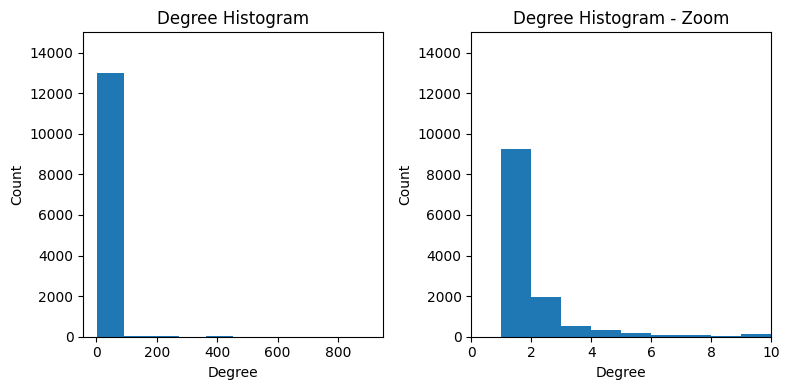

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub1 = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub1), nx.number_of_edges(gsub1)))

3822 nodes, 16657 edges


In [ ]:
#13173 nodes, 25994 edges
#3822 nodes, 16657 edges
print("Nodes removed: {:.2f}%".format(100*(1 - 3822/13173)))
print("Edges removed: {:.2f}%".format(100*(1 - 16657/25994)))
print("Edges per nodes: {:.2f}".format(16657/3822))

Nodes removed: 70.99%
Edges removed: 35.92%
Edges per nodes: 4.36


In [ ]:
top_indegree = sorted(dict(gsub1.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

42 Nintendo
36 Ign
32 Eurogamer
31 Polygon (Website)
29 Sega
29 Video Game Industry
29 Kotaku
25 Role-Playing Video Game
24 Video Game Console
22 Video Game Developer
21 Gamasutra
21 Open-World
21 Parent Company
21 Multiplayer Video Game
20 Minigame
20 Pc Gamer
20 Nonlinear Gameplay
20 Single-Player Video Game
20 Video Game Journalism
19 Cooperative Video Game
19 Player-Character
19 Player-Versus-Player
19 Nbcuniversal
19 Game Informer
19 Universal Destinations & Experiences
19 Emergent Gameplay
19 Twitch Gameplay
18 Universal Orlando
18 Esports
18 Experience Point
18 Fighting Game
17 Subsidiary
17 Universal Filmed Entertainment Group
17 Electronic Gaming Monthly
17 Nintendo Power
17 Electronic Art
17 Arcade Video Game
17 Universal Kids Resort
17 Non-Player Character
17 Quick Time Event
17 Universal Epic Universe
17 Casual Game
17 Game Engine
16 Universal Horror Unleashed
16 Video Game Genre
16 Universal Beijing
16 Universal United Kingdom
16 Arcade Game
16 Capture The Flag
16 Joystiq


# Seed 2 (Valve Corporation)

In [ ]:
SEED = SEEDS[1]

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
page

'Valve Corporation'

In [ ]:
%%time
while todo_lst:
  current_layer, current_page = todo_lst[0]

  if current_layer >= 3:
    del todo_lst[0]
    continue

  layer, page = todo_lst.pop(0)
  done_set.add(page)

  print(layer, page, len(todo_lst))

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    continue # Go to the next item in todo_lst

  candidatos = []

  for link in wiki.links:
    link = link.title()
    if link in STOPS or link.startswith("List Of") or link.startswith("In Video") or link.startswith("Video Games In"):
      continue

    if link in todo_set or link in done_set:
      continue
    g.add_edge(page, link)

    if layer == 2:
      continue

    # Atribuição de pontos
    score = 0
    if any(k in link for k in KEYWORDS):
          score += 5

    if any(suf in link for suf in company_suffixes):
      score += 5

    if any(char.isdigit() for char in link):
      score -= 5

    candidatos.append((score, link))

  random.shuffle(candidatos)
  candidatos.sort(key=lambda x: x[0], reverse=True)

  for score, link_selecionado in candidatos[:10]:
    if score <= 0:
      break
    todo_lst.append((layer + 1, link_selecionado))
    todo_set.add(link_selecionado)


0 Valve Corporation 0
1 Gamespy 9
1 Vivendi Universal Games 18
1 Gamespot 27
1 Riot Games 36
Could not load Riot Games
1 People Make Games 35
1 Prima Games 44
1 Turtle Rock Studios 48
1 Wolfire Games 57
1 Video Games Chronicle 66
Could not load Video Games Chronicle
1 Gamesindustry.Biz 65
2 Games For Windows – Live 74
2 Rockstar Games Social Club 73
2 Matchmaking (Video Games) 72
2 Gamespy Arcade 71
2 Games For Windows: The Official Magazine 70
2 Gamespy Technology 69
2 Google Play Games 68
Could not load Google Play Games
2 Multiplayer Video Game 67
2 Pc Gamer 66
2 Sniper Elite (Video Game) 65
2 Swordfish Studios 64
2 Activision Blizzard Studios 63
2 Universal Studios Japan 62
2 Universal Animation Studios 61
2 Xbox Game Studios 60
2 Universal Studios Florida 59
2 Universal Studios Singapore 58
2 Illumination Studios Paris 57
2 Nbcuniversal Syndication Studios 56
2 Telemundo Of Puerto Rico Studios 55
2 Eb Games 54
2 Rhino Video Games 53
2 Insomniac Games 52
2 Gamestation 51
Could not 

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

10378 nodes, 20018 edges


## Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Esport', 'Esports'), ('Video Game Developer', 'Video Game Developers'), ('Video Game Publisher', 'Video Game Publishers'), ('Mobile Game', 'Mobile Games'), ('Smartphone', 'Smartphones'), ('Video Game Console', 'Video Game Consoles'), ('Genre', 'Genres'), ('Mobile Device', 'Mobile Devices'), ('Penny Arcade Report', 'Penny Arcade Reports'), ('Tabletop Role-Playing Game', 'Tabletop Role-Playing Games'), ('Online Game', 'Online Games'), ('Operating System', 'Operating Systems'), ('Arcade Game', 'Arcade Games'), ('Bulletin Board System', 'Bulletin Board Systems'), ('Casual Game', 'Casual Games'), ('Experience Point', 'Experience Points'), ('Indie Game', 'Indie Games'), ('Instance Dungeon', 'Instance Dungeons'), ('Mobile Phone', 'Mobile Phones'), ('American Comic Book', 'American Comic Books'), ('Electronic Art', 'Electronic Arts'), ('Motive Studio', 'Motive Studios'), ('Blog', 'Blogs'), ('Electronic Game', 'Electronic Games'), ('Pc Game', 'Pc Games'), ('High-Level Programming Language', 

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

10332 nodes, 19989 edges


## Truncate the network

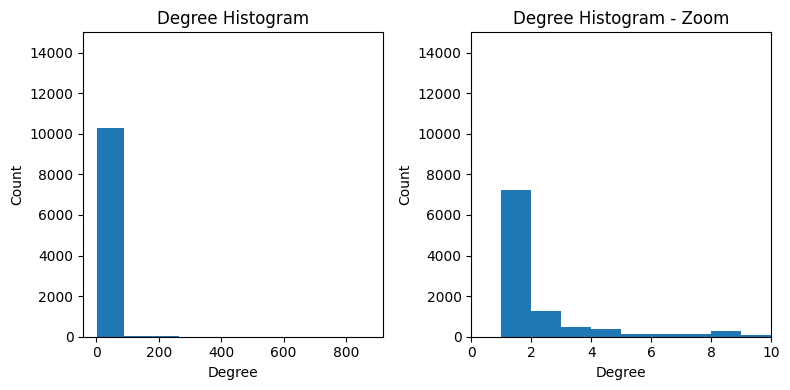

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub2 = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub2), nx.number_of_edges(gsub2)))

3095 nodes, 12752 edges


In [ ]:
#10378 nodes, 20018 edges
#3095 nodes, 12752 edges
print("Nodes removed: {:.2f}%".format(100*(1 - 3095/10378)))
print("Edges removed: {:.2f}%".format(100*(1 - 12752/20018)))
print("Edges per nodes: {:.2f}".format(12752/3095))

Nodes removed: 70.18%
Edges removed: 36.30%
Edges per nodes: 4.12


In [ ]:
top_indegree = sorted(dict(gsub2.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

37 Ign
35 Eurogamer
34 Polygon (Website)
32 Kotaku
31 Video Game Industry
25 Destructoid
25 Joystiq
25 Gamasutra
25 Parent Company
24 Steam (Service)
24 Pcgamesn
23 Shacknews
22 Edge (Magazine)
22 Video Game Console
22 Subsidiary
22 Computer Gaming World
21 Rock Paper Shotgun
21 Electronic Gaming Monthly
21 Metacritic
21 Nintendo
20 Microsoft Windows
20 Official Xbox Magazine
19 Mcv/Develop
19 The Escapist (Magazine)
18 Review Aggregator
17 Ugo Networks
17 Official U.S. Playstation Magazine
17 Gamer Network
17 Metro (British Newspaper)
17 Famitsu
17 Video Game Publisher
16 Ausgamers
16 Nintendo Power
16 Electronic Art
16 Gamezebo
16 360 (Magazine)
16 Gemaga
16 Mean Machines
16 360 Gamer
15 Playstation Official Magazine – Australia
15 Giant Bomb
15 Comptiq
15 Velikiy Drakon
15 Ace (Magazine)
15 Battle.Net
15 Pc Powerplay
15 Pc Format
15 Outsidexbox
15 Sega Visions
15 Playstation Official Magazine – Uk
15 1Up Network
15 Power Unlimited
15 Hardcore Gaming 101
15 Super Play
15 Switch Playe

# Seed 3 (Final Fantasy)

In [ ]:
SEED = SEEDS[2]

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
page

'Final Fantasy'

In [ ]:
%%time
while todo_lst:
  current_layer, current_page = todo_lst[0]

  if current_layer >= 3:
    del todo_lst[0]
    continue

  layer, page = todo_lst.pop(0)
  done_set.add(page)

  print(layer, page, len(todo_lst))

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    continue # Go to the next item in todo_lst

  candidatos = []

  for link in wiki.links:
    link = link.title()
    if link in STOPS or link.startswith("List Of") or link.startswith("In Video") or link.startswith("Video Games In"):
      continue

    if link in todo_set or link in done_set:
      continue
    g.add_edge(page, link)

    if layer == 2:
      continue

    # Atribuição de pontos
    score = 0
    if any(k in link for k in KEYWORDS):
          score += 5

    if any(suf in link for suf in company_suffixes):
      score += 5

    if any(char.isdigit() for char in link):
      score -= 5

    candidatos.append((score, link))

  random.shuffle(candidatos)
  candidatos.sort(key=lambda x: x[0], reverse=True)

  for score, link_selecionado in candidatos[:10]:
    if score <= 0:
      break
    todo_lst.append((layer + 1, link_selecionado))
    todo_set.add(link_selecionado)


0 Final Fantasy 0
1 Japanese Role-Playing Games 9
1 Gamespy 18
1 Ultimate History Of Video Games 27
1 Gamespot 30
1 Gamestop 39
Could not load Gamestop
1 Gamesradar+ 38
1 Video Game Remake 47
1 Retro Gamer 56
1 Parasite Eve (Video Game) 65
Could not load Parasite Eve (Video Game)
1 Game Informer 64
2 History Of Eastern Role-Playing Video Games 73
Could not load History Of Eastern Role-Playing Video Games
2 Timeline Of Tabletop Role-Playing Games 72
2 Attribute (Role-Playing Games) 71
2 Statistic (Role-Playing Games) 70
2 Polish Role-Playing Games 69
2 History Of Role-Playing Games 68
2 Traveller (Role-Playing Game) 67
Could not load Traveller (Role-Playing Game)
2 Game Studies 66
Could not load Game Studies
2 Generic Role-Playing Game System 65
2 Indie Game 64


/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Indie Game
2 Games For Windows: The Official Magazine 63
2 Google Play Games 62
Could not load Google Play Games
2 Gamespy Arcade 61
2 Games For Windows – Live 60
2 Matchmaking (Video Games) 59
2 Gamesindustry.Biz 58
2 Gamespy Technology 57
2 Rockstar Games Social Club 56
2 Sniper Elite (Video Game) 55
2 Game Center 54
2 Electronic Games 53
2 Atari, Inc. 52
2 Gamecube 51
2 Publishers Weekly 50
2 Insomniac Games 49
2 Gunzilla Games 48
Could not load Gunzilla Games
2 Gamestation 47
Could not load Gamestation
2 Rhino Video Games 46
2 Gamestop Short Squeeze 45
2 Eb Games 44
2 Reliance, Inc. 43
2 Software Etc. 42
2 Exponent, Inc. 41
2 Greif, Inc. 40
2 Ação Games 39
2 People Make Games 38
2 Gamesmaster (Magazine) 37
2 Gamestm 36
2 Video Games Chronicle 35
Could not load Video Games Chronicle
2 Computer And Video Games 34
2 Computer Games Magazine 33
2 Gamereactor 32
2 Gamezebo 31
2 Video Game Website 30
2 Midway Games 29
2 Bethesda Game Studios 28
2 Inside Mac Games 27
2 Homeb

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

11022 nodes, 19310 edges


## Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Cd-Rom', 'Cd-Roms'), ('Dragon Warrior', 'Dragon Warriors'), ('Experience Point', 'Experience Points'), ('Pixel', 'Pixels'), ('Rhythm Game', 'Rhythm Games'), ('Role-Playing Video Game', 'Role-Playing Video Games'), ('Video Game Developer', 'Video Game Developers'), ('Video Game Genre', 'Video Game Genres'), ('Video Game Publisher', 'Video Game Publishers'), ('Indie Game', 'Indie Games'), ('Japanese Role-Playing Game', 'Japanese Role-Playing Games'), ('Role-Playing Game', 'Role-Playing Games'), ('Tabletop Role-Playing Game', 'Tabletop Role-Playing Games'), ('Smartphone', 'Smartphones'), ('Arcade Game', 'Arcade Games'), ('Emulator', 'Emulators'), ('Fangame', 'Fangames'), ('Pc Game', 'Pc Games'), ('Hit Point', 'Hit Points'), ('Fanzine', 'Fanzines'), ('Mainframe Computer', 'Mainframe Computers'), ('Genre', 'Genres'), ('First-Person Shooter', 'First-Person Shooters'), ('Amusement Arcade', 'Amusement Arcades'), ('Iphone 3G', 'Iphone 3Gs'), ('Iphone X', 'Iphone Xs'), ('Audio Game', 'Audio G

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

10953 nodes, 19265 edges


## Truncate the network

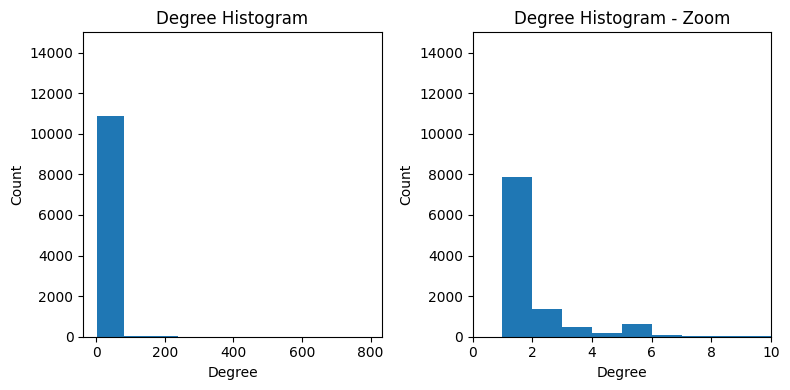

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub3 = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub3), nx.number_of_edges(gsub3)))

3060 nodes, 11372 edges


In [ ]:
#11022 nodes, 19310 edges
#3060 nodes, 11372 edges
print("Nodes removed: {:.2f}%".format(100*(1 - 3060/11022)))
print("Edges removed: {:.2f}%".format(100*(1 - 11372/19310)))
print("Edges per nodes: {:.2f}".format(11372/3060))

Nodes removed: 72.24%
Edges removed: 41.11%
Edges per nodes: 3.72


In [ ]:
top_indegree = sorted(dict(gsub3.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

37 Ign
36 Eurogamer
36 Polygon (Website)
35 Kotaku
28 Joystiq
25 Electronic Gaming Monthly
24 Destructoid
24 Computer Gaming World
23 Rock Paper Shotgun
22 Metacritic
22 The Escapist (Magazine)
21 Edge (Magazine)
21 Shacknews
21 Pcgamesn
21 Gamasutra
20 Role-Playing Video Game
20 Nintendo Power
20 Mcv/Develop
20 Famitsu
20 Nintendo
20 Official Nintendo Magazine
19 Giant Bomb
19 Official Xbox Magazine
19 Review Aggregator
18 Comptiq
18 Ugo Networks
18 Gameplanet
18 Official U.S. Playstation Magazine
18 Sega Visions
18 Metro (British Newspaper)
18 Gemaga
18 Mean Machines
18 Easy Allies
18 Hobbyconsolas
18 4Players
18 Playstation: The Official Magazine
18 B'S Log
17 Playstation Official Magazine – Australia
17 Velikiy Drakon
17 Ace (Magazine)
17 Ausgamers
17 Steam (Service)
17 Pc Powerplay
17 Pc Format
17 Outsidexbox
17 Playstation Official Magazine – Uk
17 1Up Network
17 Power Unlimited
17 Hardcore Gaming 101
17 Super Play
17 Video Game Developer
17 360 (Magazine)
17 Switch Player
17 Pla

# Seed 4 (Minecraft)

In [ ]:
SEED = SEEDS[3]

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
page

'Minecraft'

In [ ]:
%%time
while todo_lst:
  current_layer, current_page = todo_lst[0]

  if current_layer >= 3:
    del todo_lst[0]
    continue

  layer, page = todo_lst.pop(0)
  done_set.add(page)

  print(layer, page, len(todo_lst))

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    continue # Go to the next item in todo_lst

  candidatos = []

  for link in wiki.links:
    link = link.title()
    if link in STOPS or link.startswith("List Of") or link.startswith("In Video") or link.startswith("Video Games In"):
      continue

    if link in todo_set or link in done_set:
      continue
    g.add_edge(page, link)

    if layer == 2:
      continue

    # Atribuição de pontos
    score = 0
    if any(k in link for k in KEYWORDS):
          score += 5

    if any(suf in link for suf in company_suffixes):
      score += 5

    if any(char.isdigit() for char in link):
      score -= 5

    candidatos.append((score, link))

  random.shuffle(candidatos)
  candidatos.sort(key=lambda x: x[0], reverse=True)

  for score, link_selecionado in candidatos[:10]:
    if score <= 0:
      break
    todo_lst.append((layer + 1, link_selecionado))
    todo_set.add(link_selecionado)


0 Minecraft 0
1 The Art Of Video Games 9
1 Halo Studios 18
1 Gamesradar 27
1 British Academy Video Games Awards 36
1 Radica Games 45
Could not load Radica Games
1 Xbox Games Store 44
1 Third-Person (Video Games) 53
Could not load Third-Person (Video Games)
1 Boss (Video Games) 52
1 Homebrew (Video Games) 61
1 Gamesradar+ 70
2 Intellectual Property Protection Of Video Games 79
2 History Of Video Games (Second Generation) 78
2 Sex And Nudity In Video Games 77
2 Advertising In Video Games 76
2 Video Games Player 75
2 Level (Video Games) 74
2 Crowdfunding In Video Games 73
2 History Of Video Games (First-Generation Systems) 72
2 Digital Distribution Of Video Games 71
2 Indie Games 70
2 Mojang Studios 69
2 Prima Games 68
2 Lionhead Studios 67
2 Pandemic Studios 66
2 Xbox Game Studios 65
2 Gamespot 64
2 Xbox Entertainment Studios 63
2 Ensemble Studios 62
2 Twisted Pixel Games 61
2 Unreleased Halo Games 60
2 Gamesmaster (Magazine) 59
2 Gamesindustry.Biz 58
2 Computer Games Magazine 57
2 Peopl

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

10050 nodes, 21886 edges


## Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Game Engine', 'Game Engines'), ('Golden Joystick Award', 'Golden Joystick Awards'), ('Microtransaction', 'Microtransactions'), ('Non-Player Character', 'Non-Player Characters'), ('Video Game Console', 'Video Game Consoles'), ('Video Game Developer', 'Video Game Developers'), ('Video Game Genre', 'Video Game Genres'), ('Video Game Publisher', 'Video Game Publishers'), ('Advergame', 'Advergames'), ('Alternate Reality Game', 'Alternate Reality Games'), ('Casual Game', 'Casual Games'), ('Indie Game', 'Indie Games'), ('Arcade Game', 'Arcade Games'), ('Website', 'Websites'), ('Cutscene', 'Cutscenes'), ('Fighting Game', 'Fighting Games'), ('Power-Up', 'Power-Ups'), ('Rhythm Game', 'Rhythm Games'), ('Role-Playing Video Game', 'Role-Playing Video Games'), ('Tabletop Role-Playing Game', 'Tabletop Role-Playing Games'), ('Cd-Rom', 'Cd-Roms'), ('Emulator', 'Emulators'), ('Genre', 'Genres'), ('Trademark', 'Trademarks'), ('City-Building Game', 'City-Building Games'), ('Console Game', 'Console Game

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

9983 nodes, 21831 edges


## Truncate the network

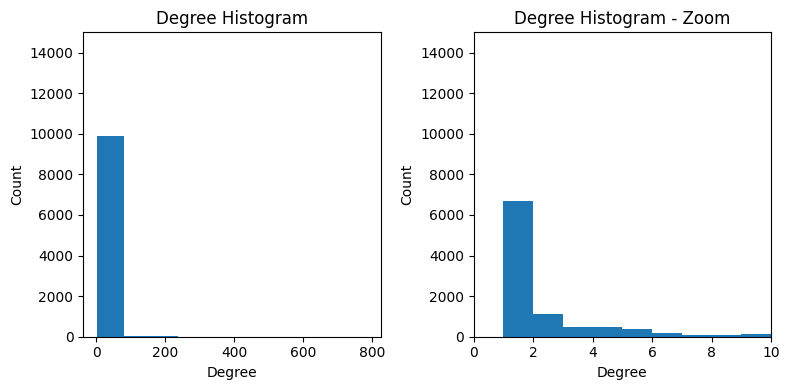

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub4 = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub4), nx.number_of_edges(gsub4)))

3277 nodes, 15125 edges


In [ ]:
#10050 nodes, 21886 edges
#3277 nodes, 15125 edges
print("Nodes removed: {:.2f}%".format(100*(1 - 3277/10050)))
print("Edges removed: {:.2f}%".format(100*(1 - 15125/21886)))
print("Edges per nodes: {:.2f}".format(15125/3277))

Nodes removed: 67.39%
Edges removed: 30.89%
Edges per nodes: 4.62


In [ ]:
top_indegree = sorted(dict(gsub4.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

43 Ign
38 Eurogamer
35 Polygon (Website)
31 Nintendo
31 Kotaku
28 Video Game Developer
28 Gamasutra
28 Video Game Industry
26 Game Informer
25 Sega
25 Destructoid
24 Joystiq
24 Pcgamesn
22 Edge (Magazine)
22 Role-Playing Video Game
22 Multiplayer Video Game
21 Official Xbox Magazine
21 Arcade Video Game
21 Electronic Arts
20 Cooperative Video Game
20 Minigame
20 Rock Paper Shotgun
20 Retro Gamer
20 The Escapist (Magazine)
19 Ars Technica
19 Player-Versus-Player
19 Computer Gaming World
19 Emergent Gameplay
18 Steam (Service)
18 Electronic Gaming Monthly
18 Activision
18 Shacknews
18 Nonlinear Gameplay
18 The Guardian
18 Open-World
18 Cloud Gaming
18 Bungie
18 Game Engine
18 Twitch Gameplay
18 Msn Games
17 Giant Bomb
17 Video Game Genre
17 The Verge
17 Microsoft Windows
17 Video Game Clone
17 Ninja Theory
17 Downloadable Content
17 Famitsu
17 Double Fine
17 Single-Player Video Game
16 Gamer Network
16 Sony Interactive Entertainment
16 Mcv/Develop
16 The New York Times
16 Indie Game
16 F

# Seed 5 (Esports)

In [ ]:
SEED = SEEDS[4]

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
page

'Esports'

In [ ]:
%%time
while todo_lst:
  current_layer, current_page = todo_lst[0]

  if current_layer >= 3:
    del todo_lst[0]
    continue

  layer, page = todo_lst.pop(0)
  done_set.add(page)

  print(layer, page, len(todo_lst))

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    continue # Go to the next item in todo_lst

  candidatos = []

  for link in wiki.links:
    link = link.title()
    if link in STOPS or link.startswith("List Of") or link.startswith("In Video") or link.startswith("Video Games In"):
      continue

    if link in todo_set or link in done_set:
      continue
    g.add_edge(page, link)

    if layer == 2:
      continue

    # Atribuição de pontos
    score = 0
    if any(k in link for k in KEYWORDS):
          score += 5

    if any(suf in link for suf in company_suffixes):
      score += 5

    if any(char.isdigit() for char in link):
      score -= 5

    candidatos.append((score, link))

  random.shuffle(candidatos)
  candidatos.sort(key=lambda x: x[0], reverse=True)

  for score, link_selecionado in candidatos[:10]:
    if score <= 0:
      break
    todo_lst.append((layer + 1, link_selecionado))
    todo_set.add(link_selecionado)


0 Esports 0
1 Ancient Olympic Games 9
1 World Masters Games 18
1 Bengali Traditional Games 27
1 Paralympic Games 36
1 European Masters Games 45
1 Traditional Games Of India 54
1 Gamesmanship 63
1 Olympic Games 62
1 Traditional Sports And Games 71
1 Lawn Game 80
2 Panathenaic Games 89
2 Gay Games 88
Could not load Gay Games
2 Bids For The Olympic Games 87
2 Micronesian Games 86
2 Commonwealth Youth Games 85
2 Indian Ocean Island Games 84
2 Inter-Allied Games 83
2 Mediterranean Games 82
2 International Children'S Games 81
2 Pacific Games 80
2 Invictus Games 79
2 Olympic Esports Games 78
2 Philippine National Games 77
2 Gog Magog Games 76
2 Central African Games 75
2 Youth Olympic Games 74
2 National Games Of India 73
2 Cotswold Olimpick Games 72
2 Asia Pacific Deaf Games 71
2 Fespic Games 70
2 Traditional Games Of The United Arab Emirates 69
2 Traditional Games Of Oman 68
2 Traditional Games Of The Dominican Republic 67
2 Traditional Games Of Vietnam 66
2 Traditional Games Of Japan 65
2 

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

15224 nodes, 31227 edges


## Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Amateur Sport', 'Amateur Sports'), ('Combat Sport', 'Combat Sports'), ('Game', 'Games'), ('Playoff', 'Playoffs'), ('Professional Sport', 'Professional Sports'), ('Tournament', 'Tournaments'), ('Winter Sport', 'Winter Sports'), ('National Olympic Committee', 'National Olympic Committees'), ('Tyrant', 'Tyrants'), ('Abstract Strategy Game', 'Abstract Strategy Games'), ('Board Game', 'Board Games'), ('Race Game', 'Race Games'), ('Traditional Game', 'Traditional Games'), ('National Paralympic Committee', 'National Paralympic Committees'), ('National Anthem', 'National Anthems'), ('Ball Game', 'Ball Games'), ('Card Game', 'Card Games'), ('Cowrie', 'Cowries'), ('Cue Sport', 'Cue Sports'), ('Playing Card', 'Playing Cards'), ('Gold Medal', 'Gold Medals'), ('Olympic Mascot', 'Olympic Mascots'), ('Silver Medal', 'Silver Medals'), ('Sport', 'Sports'), ('Playground', 'Playgrounds'), ('Puritan', 'Puritans'), ('Disabled Sport', 'Disabled Sports'), ('Humpback Whale', 'Humpback Whales'), ('Joint Loc

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

15168 nodes, 31193 edges


## Truncate the network

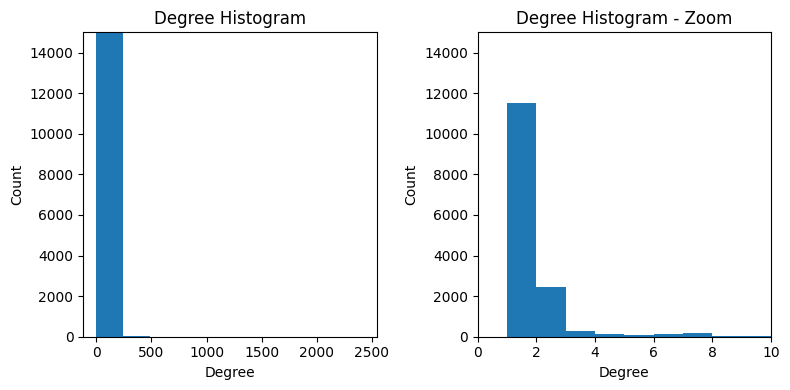

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub5 = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub5), nx.number_of_edges(gsub5)))


3667 nodes, 19692 edges


In [ ]:
#15224 nodes, 31227 edges
#3667 nodes, 19692 edges
print("Nodes removed: {:.2f}%".format(100*(1 - 3667/15224)))
print("Edges removed: {:.2f}%".format(100*(1 - 19692/31227)))
print("Edges per nodes: {:.2f}".format(19692/3667))

Nodes removed: 75.91%
Edges removed: 36.94%
Edges per nodes: 5.37


In [ ]:
top_indegree = sorted(dict(gsub5.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

52 Multi-Sport Event
52 South Asian Games
51 West Asian Games
51 African Games
51 Winter Sport
51 Olympic Esports Series
51 European Games
51 Pan American Games
51 Special Olympics
51 South American Games
51 Central American Games
51 Deaflympics
51 Games Of The Small States Of Europe
50 Senior Olympics
50 Esports World Cup
50 Latin America
50 Commonwealth Games
50 Naadam
50 Jeux De La Francophonie
50 World Cyber Games
50 Parasports
50 Asian Indoor And Martial Arts Games
50 Asian Winter Games
49 National Games Of China
49 European Youth Olympic Festival
49 Croatian World Games
49 Sunshine State Games
49 Khelo India Youth Games
49 West African Games
49 Heraean Games
49 Alba Games
49 Ibsa World Games
49 West African University Games
49 World Police And Fire Games
49 Lusofonia Games
49 California State Games
49 Aau Junior Olympic Games
49 Black Sea Games
49 National Sports Week (Indonesia)
49 Bangladesh Games
49 Saskatchewan Games
49 National Winter Games Of China
49 Polish Youth Olympic D

# Explore the network

In [ ]:
G_final = nx.compose_all([gsub1, gsub2, gsub3, gsub4, gsub5])

print(f"Total de nós: {len(G_final)}")
print(f"Total de arestas: {nx.number_of_edges(G_final)}")

Total de nós: 10267
Total de arestas: 57525


In [ ]:
top_indegree = sorted(dict(G_final.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

89 Ign
79 Eurogamer
76 Nintendo
74 Polygon (Website)
73 Video Game Industry
70 Kotaku
60 Gamasutra
54 Sega
53 Video Game Developer
52 Role-Playing Video Game
52 Multi-Sport Event
52 South Asian Games
51 Parent Company
51 West Asian Games
51 African Games
51 Winter Sport
51 Olympic Esports Series
51 European Games
51 Pan American Games
51 Special Olympics
51 South American Games
51 Central American Games
51 Deaflympics
51 Games Of The Small States Of Europe
50 Senior Olympics
50 Esports World Cup
50 Latin America
50 Commonwealth Games
50 Naadam
50 Jeux De La Francophonie
50 World Cyber Games
50 Parasports
50 Asian Indoor And Martial Arts Games
50 Asian Winter Games
49 National Games Of China
49 European Youth Olympic Festival
49 Croatian World Games
49 Sunshine State Games
49 Khelo India Youth Games
49 West African Games
49 Heraean Games
49 Alba Games
49 Ibsa World Games
49 West African University Games
49 World Police And Fire Games
49 Lusofonia Games
49 California State Games
49 Aau J

In [ ]:
nx.write_graphml(gsub1, "cna1.graphml")
nx.write_graphml(gsub2, "cna2.graphml")
nx.write_graphml(gsub3, "cna3.graphml")
nx.write_graphml(gsub4, "cna4.graphml")
nx.write_graphml(gsub5, "cna5.graphml")
nx.write_graphml(G_final, "cna6.graphml")